## in this project i have used the data with scalling techiniques like standard scalar,minmax and also without scaling is also done ,also removed the outliers
## models that have used are logistic regression,decision tree,random forest,knn,gradient boosting, ada boost,naive bayes
## the cross validation techniques that have used are, hold out cv,k fold cv, stratified k fold cv,grid search cv,random search cv

In [639]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeavePOut,cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv("water_potability.csv")

# the data set is about the water is safe to drink or not based on its features

### 1. ph: pH of 1. water (0 to 14).
### 2. Hardness: Capacity of water to precipitate soap in mg/L.
### 3. Solids: Total dissolved solids in ppm.
### 4. Chloramines: Amount of Chloramines in ppm.
### 5. Sulfate: Amount of Sulfates dissolved in mg/L.
### 6. Conductivity: Electrical conductivity of water in μS/cm.
### 7. Organic_carbon: Amount of organic carbon in ppm.
### 8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
### 9. Turbidity: Measure of light emiting property of water in NTU.
### 10. Potability: Indicates if water is safe for human consumption. Potable -1 and Not potable -0

In [3]:
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [4]:
df.shape

(3276, 10)

In [5]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
df["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

# replacing missing values with mean

In [8]:
df['ph']=df['ph'].replace(to_replace=0, value=np.NaN)
df['ph']=df['ph'].astype(float)
mean=df['ph'].mean()
df['ph'].replace(np.NaN,mean,inplace=True)

In [9]:
df['Sulfate']=df['Sulfate'].replace(to_replace=0, value=np.NaN)
df['Sulfate']=df['Sulfate'].astype(float)
mean=df['Sulfate'].mean()
df['Sulfate'].replace(np.NaN,mean,inplace=True)

In [10]:
df['Trihalomethanes']=df['Trihalomethanes'].replace(to_replace=0, value=np.NaN)
df['Trihalomethanes']=df['Trihalomethanes'].astype(float)
mean=df['Trihalomethanes'].mean()
df['Trihalomethanes'].replace(np.NaN,mean,inplace=True)

In [11]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [230]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [231]:
low,upp=remove_outlier(df['ph'])
df["ph"]=np.where(df['ph']>upp,upp,df['ph'])
df["ph"]=np.where(df['ph']<low,low,df['ph'])

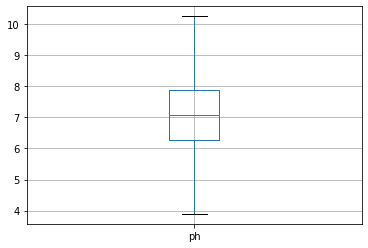

In [232]:
df.boxplot(column=["ph"])
plt.show()

In [234]:
low,upp=remove_outlier(df['Hardness'])
df["Hardness"]=np.where(df['Hardness']>upp,upp,df['Hardness'])
df["Hardness"]=np.where(df['Hardness']<low,low,df['Hardness'])

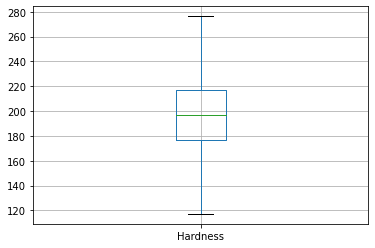

In [235]:
df.boxplot(column=["Hardness"])
plt.show()

In [236]:
low,upp=remove_outlier(df['Solids'])
df["Solids"]=np.where(df['Solids']>upp,upp,df['Solids'])
df["Solids"]=np.where(df['Solids']<low,low,df['Solids'])

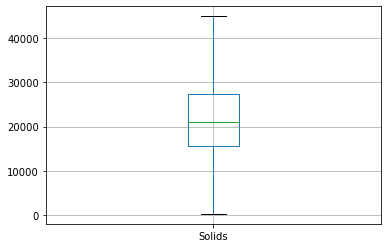

In [245]:
df.boxplot(column=["Solids"])
plt.show()

In [237]:
low,upp=remove_outlier(df['Chloramines'])
df["Chloramines"]=np.where(df['Chloramines']>upp,upp,df['Chloramines'])
df["Chloramines"]=np.where(df['Chloramines']<low,low,df['Chloramines'])

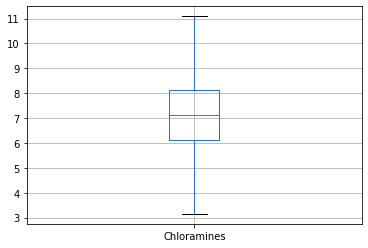

In [246]:
df.boxplot(column=["Chloramines"])
plt.show()

In [238]:
low,upp=remove_outlier(df['Sulfate'])
df["Sulfate"]=np.where(df['Sulfate']>upp,upp,df['Sulfate'])
df["Sulfate"]=np.where(df['Sulfate']<low,low,df['Sulfate'])

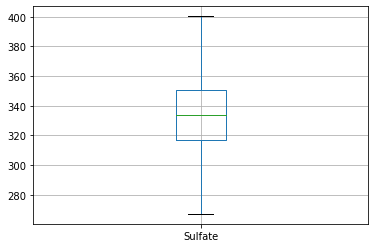

In [247]:
df.boxplot(column=["Sulfate"])
plt.show()

In [239]:
low,upp=remove_outlier(df['Conductivity'])
df["Conductivity"]=np.where(df['Conductivity']>upp,upp,df['Conductivity'])
df["Conductivity"]=np.where(df['Conductivity']<low,low,df['Conductivity'])

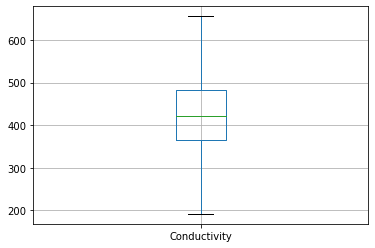

In [248]:
df.boxplot(column=["Conductivity"])
plt.show()

In [240]:
low,upp=remove_outlier(df['Organic_carbon'])
df["Organic_carbon"]=np.where(df['Organic_carbon']>upp,upp,df['Organic_carbon'])
df["Organic_carbon"]=np.where(df['Organic_carbon']<low,low,df['Organic_carbon'])

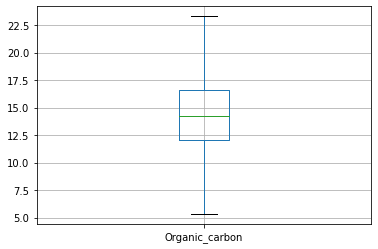

In [249]:
df.boxplot(column=["Organic_carbon"])
plt.show()

In [241]:
low,upp=remove_outlier(df['Trihalomethanes'])
df["Trihalomethanes"]=np.where(df['Trihalomethanes']>upp,upp,df['Trihalomethanes'])
df["Trihalomethanes"]=np.where(df['Trihalomethanes']<low,low,df['Trihalomethanes'])

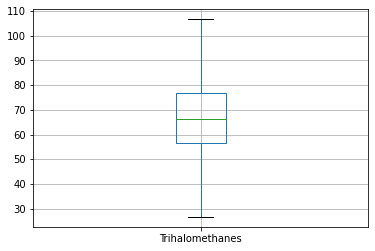

In [250]:
df.boxplot(column=["Trihalomethanes"])
plt.show()

In [244]:
low,upp=remove_outlier(df['Potability'])
df["Potability"]=np.where(df['Potability']>upp,upp,df['Potability'])
df["Potability"]=np.where(df['Potability']<low,low,df['Potability'])

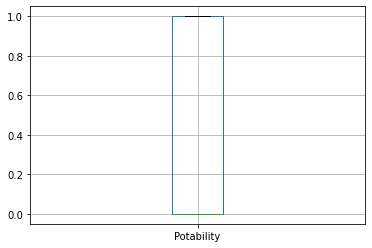

In [251]:
df.boxplot(column=["Potability"])
plt.show()

In [243]:
low,upp=remove_outlier(df['Turbidity'])
df["Turbidity"]=np.where(df['Turbidity']>upp,upp,df['Turbidity'])
df["Turbidity"]=np.where(df['Turbidity']<low,low,df['Turbidity'])

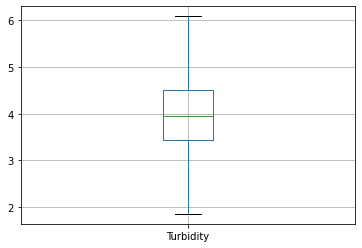

In [252]:
df.boxplot(column=["Turbidity"])
plt.show()

In [253]:
x=df.drop(['Potability'],axis=1)
y=df[['Potability']]

In [254]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [255]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)

In [256]:
lr=LogisticRegression()

In [257]:
lr.fit(x_train,y_train)

LogisticRegression()

In [258]:
lr.score(x_train,y_train)

0.6162232882686437

In [259]:
lr.score(x_test,y_test)

0.595116988809766

In [512]:
dt=DecisionTreeClassifier(max_depth=3,max_features=5,random_state=1)

In [513]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features=5, random_state=1)

In [514]:
dt.score(x_train,y_train)

0.6668120366332315

In [515]:
dt.score(x_test,y_test)

0.62970498474059

In [264]:
rf= RandomForestClassifier()
                        

In [265]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [266]:
rf.score(x_train,y_train)

1.0

In [267]:
rf.score(x_test,y_test)

0.6429298067141404

In [422]:
kn= KNeighborsClassifier(n_neighbors=20,p=9)

In [423]:
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20, p=9)

In [424]:
kn.score(x_train,y_train)

0.6293065852594854

In [425]:
kn.score(x_test,y_test)

0.5879959308240081

In [442]:
gb= GradientBoostingClassifier(n_estimators=7,max_depth=3)

In [443]:
gb.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=7)

In [444]:
gb.score(x_train,y_train)

0.6694286960313999

In [445]:
gb.score(x_test,y_test)

0.6164801627670397

In [478]:
ab= AdaBoostClassifier(n_estimators=20,random_state=1)

In [479]:
ab.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=20, random_state=1)

In [480]:
ab.score(x_train,y_train)

0.647187091146969

In [481]:
ab.score(x_test,y_test)

0.5991861648016277

In [280]:
nb= GaussianNB()

In [281]:
nb.fit(x_train,y_train)

GaussianNB()

In [41]:
nb.score(x_test,y_test)

0.6195320447609359

In [42]:
nb.score(x_train,y_train)

0.6323593545573485

# with standar scaling

# logistic regression

In [43]:
df2=pd.read_csv("water_potability.csv")

In [44]:
df2.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [45]:
df2.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [46]:
df2['ph']=df2['ph'].replace(to_replace=0, value=np.NaN)
df2['ph']=df2['ph'].astype(float)
mean=df2['ph'].mean()
df2['ph'].replace(np.NaN,mean,inplace=True)

In [47]:
df2['Sulfate']=df2['Sulfate'].replace(to_replace=0, value=np.NaN)
df2['Sulfate']=df2['Sulfate'].astype(float)
mean=df2['Sulfate'].mean()
df2['Sulfate'].replace(np.NaN,mean,inplace=True)

In [48]:
df2['Trihalomethanes']=df2['Trihalomethanes'].replace(to_replace=0, value=np.NaN)
df2['Trihalomethanes']=df2['Trihalomethanes'].astype(float)
mean=df2['Trihalomethanes'].mean()
df2['Trihalomethanes'].replace(np.NaN,mean,inplace=True)

In [49]:
df2.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [50]:
duplicate=df2.duplicated()
print(duplicate.sum())
df[duplicate]

0


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
ss= StandardScaler()
ss

StandardScaler()

In [53]:
df2['ph']=ss.fit_transform(df2[['ph']])

In [54]:
df2['Hardness']=ss.fit_transform(df2[['Hardness']])

In [55]:
df2['Solids']=ss.fit_transform(df2[['Solids']])

In [56]:
df2['Chloramines']=ss.fit_transform(df2[['Chloramines']])

In [57]:
df2['Sulfate']=ss.fit_transform(df2[['Sulfate']])

In [58]:
df2['Conductivity']=ss.fit_transform(df2[['Conductivity']])

In [59]:
df2['Organic_carbon']=ss.fit_transform(df2[['Organic_carbon']])

In [60]:
df2['Trihalomethanes']=ss.fit_transform(df2[['Trihalomethanes']])

In [61]:
df2['Turbidity']=ss.fit_transform(df2[['Turbidity']])

In [62]:
df2['Potability']=ss.fit_transform(df2[["Potability"]])

In [63]:
x=df.drop(['Potability'],axis=1)
y=df[['Potability']]

In [64]:
x_scaled = ss.fit_transform(x) 
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size=0.3,random_state=1) 
lr2 = LogisticRegression() 
lr2.fit(x_train, y_train) 
print("training score:-",lr2.score(x_train,y_train))
print("testing score:-", lr2.score(x_test, y_test))

training score:- 0.615787178368949
testing score:- 0.595116988809766


# knn

In [65]:
df3=pd.read_csv("water_potability.csv")

In [66]:
df3.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [67]:
df3.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [68]:
df3['ph']=df3['ph'].replace(to_replace=0, value=np.NaN)
df3['ph']=df3['ph'].astype(float)
mean=df3['ph'].mean()
df3['ph'].replace(np.NaN,mean,inplace=True)

In [69]:
df3['Sulfate']=df3['Sulfate'].replace(to_replace=0, value=np.NaN)
df3['Sulfate']=df3['Sulfate'].astype(float)
mean=df3['Sulfate'].mean()
df3['Sulfate'].replace(np.NaN,mean,inplace=True)

In [70]:
df3['Trihalomethanes']=df3['Trihalomethanes'].replace(to_replace=0, value=np.NaN)
df3['Trihalomethanes']=df3['Trihalomethanes'].astype(float)
mean=df3['Trihalomethanes'].mean()
df3['Trihalomethanes'].replace(np.NaN,mean,inplace=True)

In [71]:
from sklearn.preprocessing import StandardScaler
ss2= StandardScaler()
ss2

StandardScaler()

In [72]:
df3['ph']=ss2.fit_transform(df3[['ph']])
df3['Hardness']=ss2.fit_transform(df3[['Hardness']])
df3['Solids']=ss2.fit_transform(df3[['Solids']])
df3['Chloramines']=ss2.fit_transform(df3[['Chloramines']])
df3['Sulfate']=ss2.fit_transform(df3[['Sulfate']])
df3['Conductivity']=ss2.fit_transform(df3[['Conductivity']])
df3['Organic_carbon']=ss2.fit_transform(df3[['Organic_carbon']])
df3['Trihalomethanes']=ss2.fit_transform(df3[['Trihalomethanes']])
df3['Turbidity']=ss2.fit_transform(df3[['Turbidity']])
df3['Potability']=ss2.fit_transform(df3[['Potability']])

In [73]:
df3.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability         float64
dtype: object

In [74]:
x=df.drop(['Potability'],axis=1)
y=df[['Potability']]

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn2= KNeighborsClassifier()
knn2

KNeighborsClassifier()

In [76]:
x_scaled = ss2.fit_transform(x) 
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size=0.3,random_state=1) 
knn2= KNeighborsClassifier()
knn2.fit(x_train, y_train) 
print("training score:-",lr2.score(x_train,y_train))
print("testing score:-", lr2.score(x_test, y_test))

training score:- 0.615787178368949
testing score:- 0.595116988809766


# decision tree

In [77]:
df4=pd.read_csv("water_potability.csv")

In [78]:
df4.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [79]:
df4.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [80]:
df4['ph']=df4['ph'].replace(to_replace=0, value=np.NaN)
df4['ph']=df4['ph'].astype(float)
mean=df4['ph'].mean()
df4['ph'].replace(np.NaN,mean,inplace=True)

In [81]:
df4['Sulfate']=df4['Sulfate'].replace(to_replace=0, value=np.NaN)
df4['Sulfate']=df4['Sulfate'].astype(float)
mean=df4['Sulfate'].mean()
df4['Sulfate'].replace(np.NaN,mean,inplace=True)

In [82]:
df4['Trihalomethanes']=df4['Trihalomethanes'].replace(to_replace=0, value=np.NaN)
df4['Trihalomethanes']=df4['Trihalomethanes'].astype(float)
mean=df4['Trihalomethanes'].mean()
df4['Trihalomethanes'].replace(np.NaN,mean,inplace=True)

In [83]:
from sklearn.preprocessing import StandardScaler
ss3= StandardScaler()
ss3

StandardScaler()

In [84]:
df4['ph']=ss3.fit_transform(df4[['ph']])
df4['Hardness']=ss3.fit_transform(df4[['Hardness']])
df4['Solids']=ss3.fit_transform(df4[['Solids']])
df4['Chloramines']=ss3.fit_transform(df4[['Chloramines']])
df4['Sulfate']=ss3.fit_transform(df4[['Sulfate']])
df4['Conductivity']=ss3.fit_transform(df4[['Conductivity']])
df4['Organic_carbon']=ss3.fit_transform(df4[['Organic_carbon']])
df4['Trihalomethanes']=ss3.fit_transform(df4[['Trihalomethanes']])
df4['Turbidity']=ss3.fit_transform(df4[['Turbidity']])
df4['Potability']=ss3.fit_transform(df4[['Potability']])

In [85]:
x=df.drop(['Potability'],axis=1)
y=df[['Potability']]

In [86]:
from sklearn.tree import DecisionTreeClassifier
dt2= DecisionTreeClassifier()

In [87]:
x_scaled = ss3.fit_transform(x) 
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size=0.3,random_state=1) 
dt2= DecisionTreeClassifier()
dt2.fit(x_train, y_train) 
print("training score:-",dt2.score(x_train,y_train))
print("testing score:-", dt2.score(x_test, y_test))

training score:- 1.0
testing score:- 0.5635808748728383


# random forest

In [88]:
df5=pd.read_csv("water_potability.csv")

In [89]:
df5.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [90]:
df5.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [91]:
df5['ph']=df5['ph'].replace(to_replace=0, value=np.NaN)
df5['ph']=df5['ph'].astype(float)
mean=df5['ph'].mean()
df5['ph'].replace(np.NaN,mean,inplace=True)

In [92]:
df5['Sulfate']=df5['Sulfate'].replace(to_replace=0, value=np.NaN)
df5['Sulfate']=df5['Sulfate'].astype(float)
mean=df5['Sulfate'].mean()
df5['Sulfate'].replace(np.NaN,mean,inplace=True)

In [93]:
df5['Trihalomethanes']=df5['Trihalomethanes'].replace(to_replace=0, value=np.NaN)
df5['Trihalomethanes']=df5['Trihalomethanes'].astype(float)
mean=df5['Trihalomethanes'].mean()
df5['Trihalomethanes'].replace(np.NaN,mean,inplace=True)

In [94]:
from sklearn.preprocessing import StandardScaler
ss4= StandardScaler()
ss4

StandardScaler()

In [95]:
df5['ph']=ss4.fit_transform(df5[['ph']])
df5['Hardness']=ss4.fit_transform(df5[['Hardness']])
df5['Solids']=ss4.fit_transform(df5[['Solids']])
df5['Chloramines']=ss4.fit_transform(df5[['Chloramines']])
df5['Sulfate']=ss4.fit_transform(df5[['Sulfate']])
df5['Conductivity']=ss4.fit_transform(df5[['Conductivity']])
df5['Organic_carbon']=ss4.fit_transform(df5[['Organic_carbon']])
df5['Trihalomethanes']=ss4.fit_transform(df5[['Trihalomethanes']])
df5['Turbidity']=ss4.fit_transform(df5[['Turbidity']])
df5['Potability']=ss4.fit_transform(df5[['Potability']])

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
x=df.drop(['Potability'],axis=1)
y=df[['Potability']]

In [98]:
x_scaled = ss4.fit_transform(x) 
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size=0.3,random_state=1) 
rf2= RandomForestClassifier()
rf2.fit(x_train, y_train) 
print("training score:-",rf2.score(x_train,y_train))
print("testing score:-", rf2.score(x_test, y_test))

training score:- 1.0
testing score:- 0.641912512716175


# gradient boosting

In [99]:
df6=pd.read_csv("water_potability.csv")

In [100]:
df6.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [101]:
df6.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [102]:
df6['ph']=df6['ph'].replace(to_replace=0, value=np.NaN)
df6['ph']=df6['ph'].astype(float)
mean=df6['ph'].mean()
df6['ph'].replace(np.NaN,mean,inplace=True)

In [103]:
df6['Sulfate']=df6['Sulfate'].replace(to_replace=0, value=np.NaN)
df6['Sulfate']=df6['Sulfate'].astype(float)
mean=df6['Sulfate'].mean()
df6['Sulfate'].replace(np.NaN,mean,inplace=True)

In [104]:
df6['Trihalomethanes']=df6['Trihalomethanes'].replace(to_replace=0, value=np.NaN)
df6['Trihalomethanes']=df6['Trihalomethanes'].astype(float)
mean=df6['Trihalomethanes'].mean()
df6['Trihalomethanes'].replace(np.NaN,mean,inplace=True)

In [105]:
from sklearn.preprocessing import StandardScaler
ss5= StandardScaler()
ss5

StandardScaler()

In [106]:
df6['ph']=ss5.fit_transform(df6[['ph']])
df6['Hardness']=ss5.fit_transform(df6[['Hardness']])
df6['Solids']=ss5.fit_transform(df6[['Solids']])
df6['Chloramines']=ss5.fit_transform(df6[['Chloramines']])
df6['Sulfate']=ss5.fit_transform(df6[['Sulfate']])
df6['Conductivity']=ss5.fit_transform(df6[['Conductivity']])
df6['Organic_carbon']=ss5.fit_transform(df6[['Organic_carbon']])
df6['Trihalomethanes']=ss5.fit_transform(df6[['Trihalomethanes']])
df6['Turbidity']=ss5.fit_transform(df6[['Turbidity']])
df6['Potability']=ss5.fit_transform(df6[['Potability']])

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

In [108]:
x=df.drop(['Potability'],axis=1)
y=df[['Potability']]

In [109]:
x_scaled = ss5.fit_transform(x) 
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size=0.3,random_state=1) 
gb2= GradientBoostingClassifier()
gb2.fit(x_train, y_train) 
print("training score:-",gb2.score(x_train,y_train))
print("testing score:-", gb2.score(x_test, y_test))

training score:- 0.7509812472743131
testing score:- 0.6307222787385555


# ada boost

In [110]:
df7=pd.read_csv("water_potability.csv")

In [111]:
df7.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [112]:
df7.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [113]:
df7['ph']=df7['ph'].replace(to_replace=0, value=np.NaN)
df7['ph']=df7['ph'].astype(float)
mean=df7['ph'].mean()
df7['ph'].replace(np.NaN,mean,inplace=True)

In [114]:
df7['Sulfate']=df7['Sulfate'].replace(to_replace=0, value=np.NaN)
df7['Sulfate']=df7['Sulfate'].astype(float)
mean=df7['Sulfate'].mean()
df7['Sulfate'].replace(np.NaN,mean,inplace=True)

In [115]:
df7['Trihalomethanes']=df7['Trihalomethanes'].replace(to_replace=0, value=np.NaN)
df7['Trihalomethanes']=df7['Trihalomethanes'].astype(float)
mean=df7['Trihalomethanes'].mean()
df7['Trihalomethanes'].replace(np.NaN,mean,inplace=True)

In [116]:
from sklearn.preprocessing import StandardScaler
ss6= StandardScaler()
ss6

StandardScaler()

In [117]:
df7['ph']=ss6.fit_transform(df7[['ph']])
df7['Hardness']=ss6.fit_transform(df7[['Hardness']])
df7['Solids']=ss6.fit_transform(df7[['Solids']])
df7['Chloramines']=ss6.fit_transform(df7[['Chloramines']])
df7['Sulfate']=ss6.fit_transform(df7[['Sulfate']])
df7['Conductivity']=ss6.fit_transform(df7[['Conductivity']])
df7['Organic_carbon']=ss6.fit_transform(df7[['Organic_carbon']])
df7['Trihalomethanes']=ss6.fit_transform(df7[['Trihalomethanes']])
df7['Turbidity']=ss6.fit_transform(df7[['Turbidity']])
df7['Potability']=ss6.fit_transform(df7[['Potability']])

In [118]:
from sklearn.ensemble import AdaBoostClassifier

In [119]:
x=df.drop(['Potability'],axis=1)
y=df[['Potability']]

In [120]:
x_scaled = ss6.fit_transform(x) 
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size=0.3,random_state=1) 
ab2= AdaBoostClassifier()
ab2.fit(x_train, y_train) 
print("training score:-",ab2.score(x_train,y_train))
print("testing score:-", ab2.score(x_test, y_test))

training score:- 0.6633231574356738
testing score:- 0.5961342828077314


# naive bayes

In [121]:
df8=pd.read_csv("water_potability.csv")

In [122]:
df8.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [123]:
df8.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [124]:
df8['ph']=df8['ph'].replace(to_replace=0, value=np.NaN)
df8['ph']=df8['ph'].astype(float)
mean=df8['ph'].mean()
df8['ph'].replace(np.NaN,mean,inplace=True)

In [125]:
df8['Sulfate']=df8['Sulfate'].replace(to_replace=0, value=np.NaN)
df8['Sulfate']=df8['Sulfate'].astype(float)
mean=df8['Sulfate'].mean()
df8['Sulfate'].replace(np.NaN,mean,inplace=True)

In [126]:
df8['Trihalomethanes']=df8['Trihalomethanes'].replace(to_replace=0, value=np.NaN)
df8['Trihalomethanes']=df8['Trihalomethanes'].astype(float)
mean=df8['Trihalomethanes'].mean()
df8['Trihalomethanes'].replace(np.NaN,mean,inplace=True)

In [127]:
from sklearn.preprocessing import StandardScaler
ss7= StandardScaler()
ss7

StandardScaler()

In [128]:
df8['ph']=ss7.fit_transform(df8[['ph']])
df8['Hardness']=ss7.fit_transform(df8[['Hardness']])
df8['Solids']=ss7.fit_transform(df8[['Solids']])
df8['Chloramines']=ss7.fit_transform(df8[['Chloramines']])
df8['Sulfate']=ss7.fit_transform(df8[['Sulfate']])
df8['Conductivity']=ss7.fit_transform(df8[['Conductivity']])
df8['Organic_carbon']=ss7.fit_transform(df8[['Organic_carbon']])
df8['Trihalomethanes']=ss7.fit_transform(df8[['Trihalomethanes']])
df8['Turbidity']=ss7.fit_transform(df8[['Turbidity']])
df8['Potability']=ss7.fit_transform(df8[['Potability']])

In [129]:
from sklearn.naive_bayes import GaussianNB

In [130]:
x=df.drop(['Potability'],axis=1)
y=df[['Potability']]

In [131]:
x_scaled = ss7.fit_transform(x) 
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size=0.3,random_state=1) 
nb2= AdaBoostClassifier()
nb2.fit(x_train, y_train) 
print("training score:-",nb2.score(x_train,y_train))
print("testing score:-", nb2.score(x_test, y_test))

training score:- 0.6633231574356738
testing score:- 0.5961342828077314


# with minmax scalling

# logistic regression

In [132]:
df9=pd.read_csv("water_potability.csv")

In [133]:
df9.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [134]:
df9.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [135]:
df9['ph']=df9['ph'].replace(to_replace=0, value=np.NaN)
df9['ph']=df9['ph'].astype(float)
mean=df9['ph'].mean()
df9['ph'].replace(np.NaN,mean,inplace=True)

In [136]:
df9['Sulfate']=df9['Sulfate'].replace(to_replace=0, value=np.NaN)
df9['Sulfate']=df9['Sulfate'].astype(float)
mean=df9['Sulfate'].mean()
df9['Sulfate'].replace(np.NaN,mean,inplace=True)

In [137]:
df9['Trihalomethanes']=df9['Trihalomethanes'].replace(to_replace=0, value=np.NaN)
df9['Trihalomethanes']=df9['Trihalomethanes'].astype(float)
mean=df9['Trihalomethanes'].mean()
df9['Trihalomethanes'].replace(np.NaN,mean,inplace=True)

In [138]:
from sklearn.preprocessing import MinMaxScaler
mm= MinMaxScaler()
mm

MinMaxScaler()

In [139]:
df9['ph']=mm.fit_transform(df9[['ph']])
df9['Hardness']=mm.fit_transform(df9[['Hardness']])
df9['Solids']=mm.fit_transform(df9[['Solids']])
df9['Chloramines']=mm.fit_transform(df9[['Chloramines']])
df9['Sulfate']=mm.fit_transform(df9[['Sulfate']])
df9['Conductivity']=mm.fit_transform(df9[['Conductivity']])
df9['Organic_carbon']=mm.fit_transform(df9[['Organic_carbon']])
df9['Trihalomethanes']=mm.fit_transform(df9[['Trihalomethanes']])
df9['Turbidity']=mm.fit_transform(df9[['Turbidity']])
df9['Potability']=mm.fit_transform(df9[['Potability']])

In [140]:
from sklearn.linear_model import LogisticRegression

In [141]:
x=df9.drop(['Potability'],axis=1)
y=df9[['Potability']]

In [142]:
x_scaled = mm.fit_transform(x) 
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size=0.3,random_state=1) 
lr3= LogisticRegression()
lr3.fit(x_train, y_train) 
print("training score:-",lr3.score(x_train,y_train))
print("testing score:-", lr3.score(x_test, y_test))

training score:- 0.6162232882686437
testing score:- 0.595116988809766


# decision tree

In [143]:
df10=pd.read_csv("water_potability.csv")

In [144]:
df10.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [145]:
df10.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [146]:
df10['ph']=df10['ph'].replace(to_replace=0, value=np.NaN)
df10['ph']=df10['ph'].astype(float)
mean=df10['ph'].mean()
df10['ph'].replace(np.NaN,mean,inplace=True)

In [147]:
df10['Sulfate']=df10['Sulfate'].replace(to_replace=0, value=np.NaN)
df10['Sulfate']=df10['Sulfate'].astype(float)
mean=df10['Sulfate'].mean()
df10['Sulfate'].replace(np.NaN,mean,inplace=True)

In [148]:
df10['Trihalomethanes']=df10['Trihalomethanes'].replace(to_replace=0, value=np.NaN)
df10['Trihalomethanes']=df10['Trihalomethanes'].astype(float)
mean=df10['Trihalomethanes'].mean()
df10['Trihalomethanes'].replace(np.NaN,mean,inplace=True)

In [149]:
from sklearn.preprocessing import MinMaxScaler
mm2= MinMaxScaler()
mm2

MinMaxScaler()

In [150]:
df10['ph']=mm2.fit_transform(df10[['ph']])
df10['Hardness']=mm2.fit_transform(df10[['Hardness']])
df10['Solids']=mm2.fit_transform(df10[['Solids']])
df10['Chloramines']=mm2.fit_transform(df10[['Chloramines']])
df10['Sulfate']=mm2.fit_transform(df10[['Sulfate']])
df10['Conductivity']=mm2.fit_transform(df10[['Conductivity']])
df10['Organic_carbon']=mm2.fit_transform(df10[['Organic_carbon']])
df10['Trihalomethanes']=mm2.fit_transform(df10[['Trihalomethanes']])
df10['Turbidity']=mm2.fit_transform(df10[['Turbidity']])
df10['Potability']=mm2.fit_transform(df10[['Potability']])

In [151]:
from sklearn.tree import DecisionTreeClassifier

In [152]:
x=df10.drop(['Potability'],axis=1)
y=df10[['Potability']]

In [153]:
x_scaled = mm2.fit_transform(x) 
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size=0.3,random_state=1) 
dt3= DecisionTreeClassifier()
dt3.fit(x_train, y_train) 
print("training score:-",dt3.score(x_train,y_train))
print("testing score:-", dt3.score(x_test, y_test))

training score:- 1.0
testing score:- 0.5503560528992879


# random forest

In [154]:
df11=pd.read_csv("water_potability.csv")

In [155]:
df11.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [156]:
df11.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [157]:
df11['ph']=df11['ph'].replace(to_replace=0, value=np.NaN)
df11['ph']=df11['ph'].astype(float)
mean=df11['ph'].mean()
df11['ph'].replace(np.NaN,mean,inplace=True)

In [158]:
df11['Sulfate']=df11['Sulfate'].replace(to_replace=0, value=np.NaN)
df11['Sulfate']=df11['Sulfate'].astype(float)
mean=df11['Sulfate'].mean()
df11['Sulfate'].replace(np.NaN,mean,inplace=True)

In [159]:
df11['Trihalomethanes']=df11['Trihalomethanes'].replace(to_replace=0, value=np.NaN)
df11['Trihalomethanes']=df11['Trihalomethanes'].astype(float)
mean=df11['Trihalomethanes'].mean()
df11['Trihalomethanes'].replace(np.NaN,mean,inplace=True)

In [160]:
from sklearn.preprocessing import MinMaxScaler
mm3= MinMaxScaler()
mm3

MinMaxScaler()

In [161]:
df11['ph']=mm3.fit_transform(df11[['ph']])
df11['Hardness']=mm3.fit_transform(df11[['Hardness']])
df11['Solids']=mm3.fit_transform(df11[['Solids']])
df11['Chloramines']=mm3.fit_transform(df11[['Chloramines']])
df11['Sulfate']=mm3.fit_transform(df11[['Sulfate']])
df11['Conductivity']=mm3.fit_transform(df11[['Conductivity']])
df11['Organic_carbon']=mm3.fit_transform(df11[['Organic_carbon']])
df11['Trihalomethanes']=mm3.fit_transform(df11[['Trihalomethanes']])
df11['Turbidity']=mm3.fit_transform(df11[['Turbidity']])
df11['Potability']=mm3.fit_transform(df11[['Potability']])

In [162]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
x=df11.drop(['Potability'],axis=1)
y=df11[['Potability']]

In [164]:
x_scaled = mm3.fit_transform(x) 
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size=0.3,random_state=1) 
rf3= RandomForestClassifier()
rf3.fit(x_train, y_train) 
print("training score:-",rf3.score(x_train,y_train))
print("testing score:-", rf3.score(x_test, y_test))

training score:- 1.0
testing score:- 0.6703967446592065


# knn

In [165]:
df12=pd.read_csv("water_potability.csv")

In [166]:
df12.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [167]:
df12.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [168]:
df12['ph']=df12['ph'].replace(to_replace=0, value=np.NaN)
df12['ph']=df12['ph'].astype(float)
mean=df12['ph'].mean()
df12['ph'].replace(np.NaN,mean,inplace=True)

In [169]:
df12['Sulfate']=df12['Sulfate'].replace(to_replace=0, value=np.NaN)
df12['Sulfate']=df12['Sulfate'].astype(float)
mean=df12['Sulfate'].mean()
df12['Sulfate'].replace(np.NaN,mean,inplace=True)

In [170]:
df12['Trihalomethanes']=df12['Trihalomethanes'].replace(to_replace=0, value=np.NaN)
df12['Trihalomethanes']=df12['Trihalomethanes'].astype(float)
mean=df12['Trihalomethanes'].mean()
df12['Trihalomethanes'].replace(np.NaN,mean,inplace=True)

In [171]:
from sklearn.preprocessing import MinMaxScaler
mm4= MinMaxScaler()
mm4

MinMaxScaler()

In [172]:
df12['ph']=mm4.fit_transform(df12[['ph']])
df12['Hardness']=mm4.fit_transform(df12[['Hardness']])
df12['Solids']=mm4.fit_transform(df12[['Solids']])
df12['Chloramines']=mm4.fit_transform(df12[['Chloramines']])
df12['Sulfate']=mm4.fit_transform(df12[['Sulfate']])
df12['Conductivity']=mm4.fit_transform(df12[['Conductivity']])
df12['Organic_carbon']=mm4.fit_transform(df12[['Organic_carbon']])
df12['Trihalomethanes']=mm4.fit_transform(df12[['Trihalomethanes']])
df12['Turbidity']=mm4.fit_transform(df12[['Turbidity']])
df12['Potability']=mm4.fit_transform(df12[['Potability']])

In [173]:
from sklearn.neighbors import KNeighborsClassifier

In [174]:
x=df12.drop(['Potability'],axis=1)
y=df12[['Potability']]

In [175]:
x_scaled = mm4.fit_transform(x) 
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size=0.3,random_state=1) 
knn3= KNeighborsClassifier()
knn3.fit(x_train, y_train) 
print("training score:-",knn3.score(x_train,y_train))
print("testing score:-", knn3.score(x_test, y_test))

training score:- 0.7514173571740078
testing score:- 0.6093591047812817


# gradient boosting

In [176]:
df13=pd.read_csv("water_potability.csv")

In [177]:
df13.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [178]:
df13.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [179]:
df13['ph']=df13['ph'].replace(to_replace=0, value=np.NaN)
df13['ph']=df13['ph'].astype(float)
mean=df13['ph'].mean()
df13['ph'].replace(np.NaN,mean,inplace=True)

In [180]:
df13['Sulfate']=df13['Sulfate'].replace(to_replace=0, value=np.NaN)
df13['Sulfate']=df13['Sulfate'].astype(float)
mean=df13['Sulfate'].mean()
df13['Sulfate'].replace(np.NaN,mean,inplace=True)

In [181]:
df13['Trihalomethanes']=df13['Trihalomethanes'].replace(to_replace=0, value=np.NaN)
df13['Trihalomethanes']=df13['Trihalomethanes'].astype(float)
mean=df13['Trihalomethanes'].mean()
df13['Trihalomethanes'].replace(np.NaN,mean,inplace=True)

In [182]:
from sklearn.preprocessing import MinMaxScaler
mm5= MinMaxScaler()
mm5

MinMaxScaler()

In [183]:
df13['ph']=mm5.fit_transform(df13[['ph']])
df13['Hardness']=mm5.fit_transform(df13[['Hardness']])
df13['Solids']=mm5.fit_transform(df13[['Solids']])
df13['Chloramines']=mm5.fit_transform(df13[['Chloramines']])
df13['Sulfate']=mm5.fit_transform(df13[['Sulfate']])
df13['Conductivity']=mm5.fit_transform(df13[['Conductivity']])
df13['Organic_carbon']=mm5.fit_transform(df13[['Organic_carbon']])
df13['Trihalomethanes']=mm5.fit_transform(df13[['Trihalomethanes']])
df13['Turbidity']=mm5.fit_transform(df13[['Turbidity']])
df13['Potability']=mm5.fit_transform(df13[['Potability']])

In [184]:
from sklearn.ensemble import GradientBoostingClassifier

In [185]:
x=df13.drop(['Potability'],axis=1)
y=df13[['Potability']]

In [186]:
x_scaled = mm5.fit_transform(x) 
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size=0.3,random_state=1) 
gb3= GradientBoostingClassifier()
gb3.fit(x_train, y_train) 
print("training score:-",gb3.score(x_train,y_train))
print("testing score:-", gb3.score(x_test, y_test))

training score:- 0.7509812472743131
testing score:- 0.62970498474059


# ada boost

In [187]:
df14=pd.read_csv("water_potability.csv")

In [188]:
df14.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [189]:
df14.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [190]:
df14['ph']=df14['ph'].replace(to_replace=0, value=np.NaN)
df14['ph']=df14['ph'].astype(float)
mean=df14['ph'].mean()
df14['ph'].replace(np.NaN,mean,inplace=True)

In [191]:
df14['Sulfate']=df14['Sulfate'].replace(to_replace=0, value=np.NaN)
df14['Sulfate']=df14['Sulfate'].astype(float)
mean=df14['Sulfate'].mean()
df14['Sulfate'].replace(np.NaN,mean,inplace=True)

In [192]:
df14['Trihalomethanes']=df14['Trihalomethanes'].replace(to_replace=0, value=np.NaN)
df14['Trihalomethanes']=df14['Trihalomethanes'].astype(float)
mean=df14['Trihalomethanes'].mean()
df14['Trihalomethanes'].replace(np.NaN,mean,inplace=True)

In [193]:
from sklearn.preprocessing import MinMaxScaler
mm6= MinMaxScaler()
mm6

MinMaxScaler()

In [194]:
df14['ph']=mm6.fit_transform(df14[['ph']])
df14['Hardness']=mm6.fit_transform(df14[['Hardness']])
df14['Solids']=mm6.fit_transform(df14[['Solids']])
df14['Chloramines']=mm6.fit_transform(df14[['Chloramines']])
df14['Sulfate']=mm6.fit_transform(df14[['Sulfate']])
df14['Conductivity']=mm6.fit_transform(df14[['Conductivity']])
df14['Organic_carbon']=mm6.fit_transform(df14[['Organic_carbon']])
df14['Trihalomethanes']=mm6.fit_transform(df14[['Trihalomethanes']])
df14['Turbidity']=mm6.fit_transform(df14[['Turbidity']])
df14['Potability']=mm6.fit_transform(df14[['Potability']])

In [195]:
from sklearn.ensemble import AdaBoostClassifier

In [196]:
x=df14.drop(['Potability'],axis=1)
y=df14[['Potability']]

In [197]:
x_scaled = mm6.fit_transform(x) 
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size=0.3,random_state=1) 
ab3= AdaBoostClassifier()
ab3.fit(x_train, y_train) 
print("training score:-",ab3.score(x_train,y_train))
print("testing score:-", ab3.score(x_test, y_test))

training score:- 0.6633231574356738
testing score:- 0.5961342828077314


# naive bayes

In [198]:
df15=pd.read_csv("water_potability.csv")

In [199]:
df15.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [200]:
df15.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [201]:
df15['ph']=df15['ph'].replace(to_replace=0, value=np.NaN)
df15['ph']=df15['ph'].astype(float)
mean=df15['ph'].mean()
df15['ph'].replace(np.NaN,mean,inplace=True)

In [202]:
df15['Sulfate']=df15['Sulfate'].replace(to_replace=0, value=np.NaN)
df15['Sulfate']=df15['Sulfate'].astype(float)
mean=df15['Sulfate'].mean()
df15['Sulfate'].replace(np.NaN,mean,inplace=True)

In [203]:
df15['Trihalomethanes']=df15['Trihalomethanes'].replace(to_replace=0, value=np.NaN)
df15['Trihalomethanes']=df15['Trihalomethanes'].astype(float)
mean=df15['Trihalomethanes'].mean()
df15['Trihalomethanes'].replace(np.NaN,mean,inplace=True)

In [204]:
from sklearn.preprocessing import MinMaxScaler
mm7= MinMaxScaler()
mm7

MinMaxScaler()

In [205]:
df15['ph']=mm7.fit_transform(df15[['ph']])
df15['Hardness']=mm7.fit_transform(df15[['Hardness']])
df15['Solids']=mm7.fit_transform(df15[['Solids']])
df15['Chloramines']=mm7.fit_transform(df15[['Chloramines']])
df15['Sulfate']=mm7.fit_transform(df15[['Sulfate']])
df15['Conductivity']=mm7.fit_transform(df15[['Conductivity']])
df15['Organic_carbon']=mm7.fit_transform(df15[['Organic_carbon']])
df15['Trihalomethanes']=mm7.fit_transform(df15[['Trihalomethanes']])
df15['Turbidity']=mm7.fit_transform(df15[['Turbidity']])
df15['Potability']=mm7.fit_transform(df15[['Potability']])

In [206]:
from sklearn.naive_bayes import GaussianNB

In [207]:
x=df15.drop(['Potability'],axis=1)
y=df15[['Potability']]

In [208]:
x_scaled = mm7.fit_transform(x) 
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size=0.3,random_state=1) 
nb3= GaussianNB()
nb3.fit(x_train, y_train) 
print("training score:-",nb3.score(x_train,y_train))
print("testing score:-", nb3.score(x_test, y_test))

training score:- 0.6319232446576537
testing score:- 0.6185147507629705


# hold out cv

# dtree

In [209]:
predict=dt2.predict(x_test)
print("Accuracy score on training set is {}".format(accuracy_score(dt2.predict(x_train),y_train)))
print("Accuracy score on test set is {}".format(accuracy_score(predict,y_test)))

Accuracy score on training set is 0.6175316179677278
Accuracy score on test set is 0.6052899287894201


# logistic regression

In [210]:
predict=lr2.predict(x_test)
print("Accuracy score on training set is {}".format(accuracy_score(lr2.predict(x_train),y_train)))
print("Accuracy score on test set is {}".format(accuracy_score(predict,y_test)))

Accuracy score on training set is 0.6162232882686437
Accuracy score on test set is 0.595116988809766


# random forest

In [211]:
predict=rf2.predict(x_test)
print("Accuracy score on training set is {}".format(accuracy_score(rf2.predict(x_train),y_train)))
print("Accuracy score on test set is {}".format(accuracy_score(predict,y_test)))

Accuracy score on training set is 0.6162232882686437
Accuracy score on test set is 0.595116988809766


# knn

In [212]:
predict=knn2.predict(x_test)
print("Accuracy score on training set is {}".format(accuracy_score(knn2.predict(x_train),y_train)))
print("Accuracy score on test set is {}".format(accuracy_score(predict,y_test)))

Accuracy score on training set is 0.6162232882686437
Accuracy score on test set is 0.595116988809766


# gradient boosting

In [213]:
predict=gb2.predict(x_test)
print("Accuracy score on training set is {}".format(accuracy_score(gb2.predict(x_train),y_train)))
print("Accuracy score on test set is {}".format(accuracy_score(predict,y_test)))

Accuracy score on training set is 0.6162232882686437
Accuracy score on test set is 0.595116988809766


# ada boost

In [214]:
predict=ab2.predict(x_test)
print("Accuracy score on training set is {}".format(accuracy_score(ab2.predict(x_train),y_train)))
print("Accuracy score on test set is {}".format(accuracy_score(predict,y_test)))

Accuracy score on training set is 0.6162232882686437
Accuracy score on test set is 0.595116988809766


# naive bayes

In [215]:
predict=nb3.predict(x_test)
print("Accuracy score on training set is {}".format(accuracy_score(nb3.predict(x_train),y_train)))
print("Accuracy score on test set is {}".format(accuracy_score(predict,y_test)))

Accuracy score on training set is 0.6319232446576537
Accuracy score on test set is 0.6185147507629705


# k fold cv

# logistic regression

In [216]:
kf=KFold(n_splits=5)
score=cross_val_score(lr2,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.75762195 0.51145038 0.63969466 0.63053435 0.51450382]
Average Cross Validation score :0.6107610314652765


# dtree

In [217]:
kf=KFold(n_splits=5)
score=cross_val_score(dt2,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.60213415 0.52824427 0.53282443 0.53129771 0.58167939]
Average Cross Validation score :0.5552359895736363


# random forest

In [218]:
kf=KFold(n_splits=5)
score=cross_val_score(rf2,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.6875     0.57557252 0.65801527 0.58931298 0.61679389]
Average Cross Validation score :0.6254389312977099


# knn

In [219]:
kf=KFold(n_splits=5)
score=cross_val_score(knn2,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.62957317 0.53435115 0.61832061 0.56641221 0.56946565]
Average Cross Validation score :0.5836245578104636


# gradient boosting

In [519]:
kf=KFold(n_splits=5)
score=cross_val_score(gb2,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.70884146 0.54961832 0.63358779 0.60458015 0.59236641]
Average Cross Validation score :0.6177988270340717


# ada boost

In [221]:
kf=KFold(n_splits=5)
score=cross_val_score(ab2,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.70426829 0.52824427 0.58931298 0.59083969 0.52977099]
Average Cross Validation score :0.5884872463228449


# naive bayes

In [222]:
kf=KFold(n_splits=5)
score=cross_val_score(nb3,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.7027439  0.56946565 0.58778626 0.61221374 0.55114504]
Average Cross Validation score :0.604670917892385


# stratified k fold

# logistic regression

In [223]:
stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(lr2,x,y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.6097561  0.61068702 0.61068702 0.61221374 0.60916031]
Average Cross Validation score :0.6105008378328058


# dtree

In [224]:
stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(dt2,x,y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.56097561 0.56641221 0.61984733 0.53435115 0.58320611]
Average Cross Validation score :0.5729584807298455


# random forest

In [225]:
stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(rf2,x,y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.61585366 0.64580153 0.65648855 0.58625954 0.6610687 ]
Average Cross Validation score :0.6330943958294546


# knn

In [226]:
stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(knn2,x,y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.58079268 0.58320611 0.62290076 0.57862595 0.61984733]
Average Cross Validation score :0.5970745671197171


# gradient boosting

In [517]:
stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(gb2,x,y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.58841463 0.63969466 0.63664122 0.59389313 0.64732824]
Average Cross Validation score :0.6211943772109476


# ada boost

In [228]:
stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(ab2,x,y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.57621951 0.64427481 0.59083969 0.55877863 0.6       ]
Average Cross Validation score :0.5940225283932229


# naive bayes

In [229]:
stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(nb3,x,y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.60823171 0.6519084  0.58320611 0.59083969 0.6259542 ]
Average Cross Validation score :0.6120280208527276


# grid search cv

In [554]:
param_grid = { "bootstrap":[True],
               "max_features":[4,5],
               "max_depth":[3,4],
               "min_samples_leaf":[4,5],
               "min_samples_split":[5,8],
               "n_estimators":[5,6,7]
    
}

In [565]:
grid_search = GridSearchCV(estimator = rf3,param_grid = param_grid,
                          cv=3,return_train_score=True)

In [566]:
# fit the grid search to the data
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [3, 4],
                         'max_features': [4, 5], 'min_samples_leaf': [4, 5],
                         'min_samples_split': [5, 8],
                         'n_estimators': [5, 6, 7]},
             return_train_score=True)

In [567]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 5}

In [568]:
best_grid = grid_search.best_estimator_
best_grid.score(x_test,y_test)

0.6205493387589013

In [569]:
best_grid.score(x_train,y_train)

0.6790231138246838

# random search cv

In [570]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 15, num = 2)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [571]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [10, 15], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [632]:
 #Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter =4, scoring='neg_mean_absolute_error', 
                              cv = 6, verbose=2, random_state=4,n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 6 folds for each of 4 candidates, totalling 24 fits


RandomizedSearchCV(cv=6, estimator=RandomForestClassifier(), n_iter=4,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 15]},
                   random_state=4, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [633]:
best_random=rf_random.best_estimator_
best_random.score(x_test,y_test)


0.624618514750763

In [634]:
best_random.score(x_train,y_train)

0.7047535979066725